In [1]:
import opendatasets as od
import os
import pandas as pd

C:\Users\igors\AppData\Local\Temp\ipykernel_17140\3724483110.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_categorized_images = pd.read_csv("fashion_database.csv")

### Save the model

In [3]:
from tensorflow import keras

In [4]:
model = keras.saving.load_model('models/basis_model.keras') 

In [5]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [7]:
output_labels = ["gender","masterCategory","subCategory","articleType","baseColour","season","usage"]

### Evaluate model accuracy

In [8]:
import pickle
label_encoders = {}

In [9]:
for label in output_labels:
    # Hydrate the serialized objects.
    with open('encoders/encoder_{}.pkl'.format(label), 'rb') as f:
        label_encoders[label] = pickle.load(f)

### show random image

In [10]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [12]:
SMALL_DATASET = True

In [13]:
#normalize images by fixing width and height
if (SMALL_DATASET):
    IMAGE_WIDTH = 60
    IMAGE_HEIGHT = 60
else:
    IMAGE_WIDTH = 250
    IMAGE_HEIGHT = 250

In [14]:
def process_image(image_path):
    image = load_img(image_path, target_size=(IMAGE_WIDTH, IMAGE_HEIGHT,3))
    image = img_to_array(image)
    return image

In [15]:
import matplotlib.pyplot as plt

In [16]:
image_path = df_categorized_images.sample().values[0,0]
input_image = np.expand_dims(process_image(image_path), axis=0)

In [17]:
output = model.predict(input_image)

1/1 [==============================] - 1s 1s/step


In [18]:
for label in output_labels:    
    output[label] = output[label][0]

In [24]:
output[label]

array([9.9993241e-01, 4.8438025e-05, 1.1053985e-05, 3.4484080e-07,
       7.7832447e-06], dtype=float32)

In [25]:
output[label].argsort()

array([3, 4, 2, 1, 0], dtype=int64)

In [93]:
predictions = {}
for label in output_labels:
    predictions[label] = label_encoders[label].classes_[output[label].argmax(axis=0)]

In [94]:
predictions

{'gender': 'Women',
 'masterCategory': 'Apparel',
 'subCategory': 'Saree',
 'articleType': 'Sarees',
 'baseColour': 'Grey',
 'season': 'Fall',
 'usage': 'Ethnic'}

In [95]:
query_mask = ""
for label in output_labels:    
    query_mask += str(label + " == '" + predictions[label] + "' & ")
query_mask = query_mask[:-3]

In [96]:
query_mask

"gender == 'Women' & masterCategory == 'Apparel' & subCategory == 'Saree' & articleType == 'Sarees' & baseColour == 'Grey' & season == 'Fall' & usage == 'Ethnic'"

In [97]:
suggested_images = df_categorized_images.query(query_mask)


In [98]:
suggested_images["filename"]

60       dataset/fashion-product-images-small/images/59...
300      dataset/fashion-product-images-small/images/56...
1666     dataset/fashion-product-images-small/images/57...
2044     dataset/fashion-product-images-small/images/59...
2100     dataset/fashion-product-images-small/images/52...
                               ...                        
42242    dataset/fashion-product-images-small/images/59...
42533    dataset/fashion-product-images-small/images/56...
42751    dataset/fashion-product-images-small/images/51...
43440    dataset/fashion-product-images-small/images/59...
43827    dataset/fashion-product-images-small/images/59...
Name: filename, Length: 146, dtype: object

Lost Item


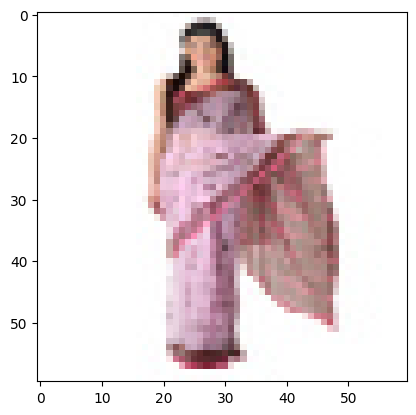

In [99]:
image = load_img(image_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
plt.imshow(image, interpolation='nearest')
print("Lost Item")
plt.show()


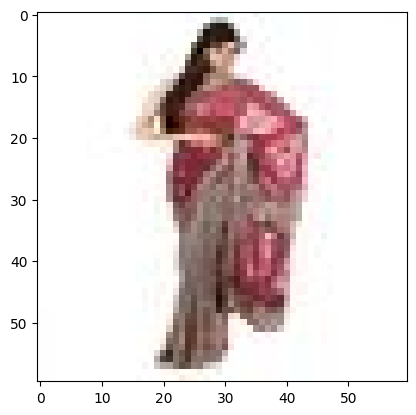

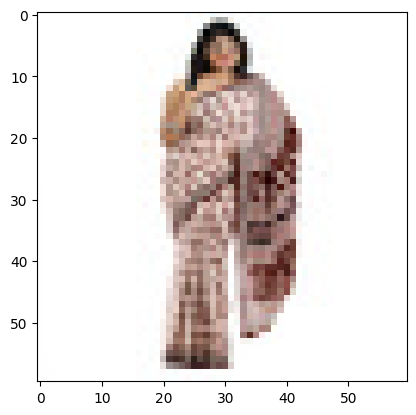

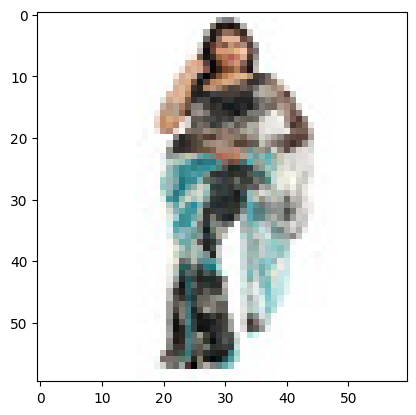

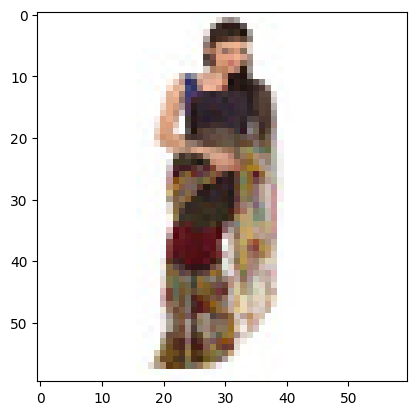

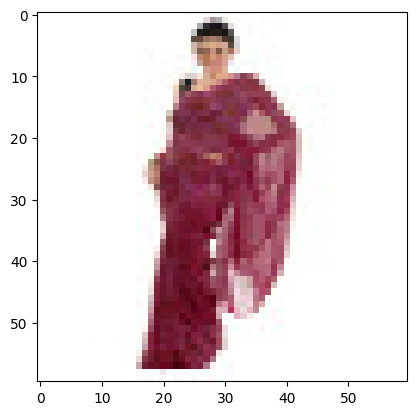

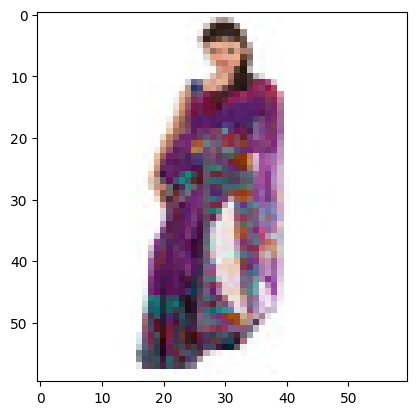

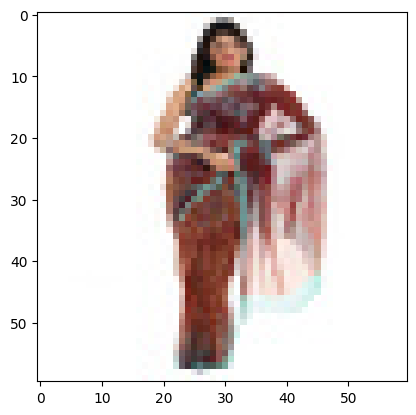

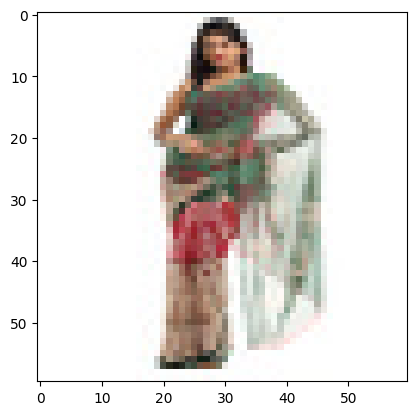

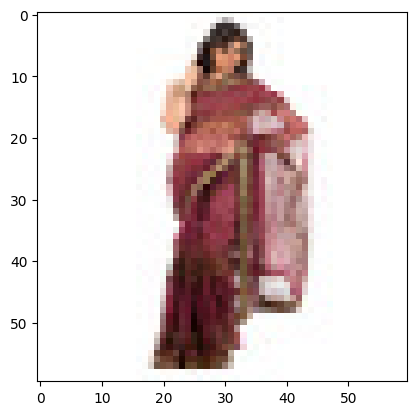

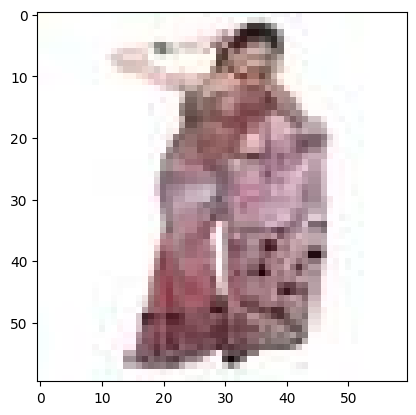

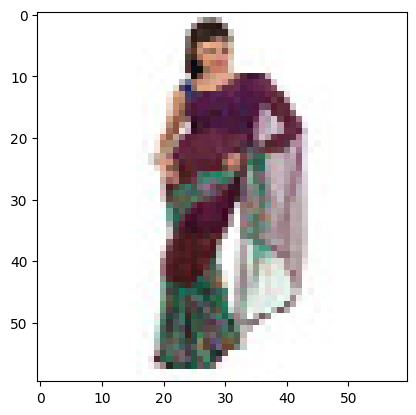

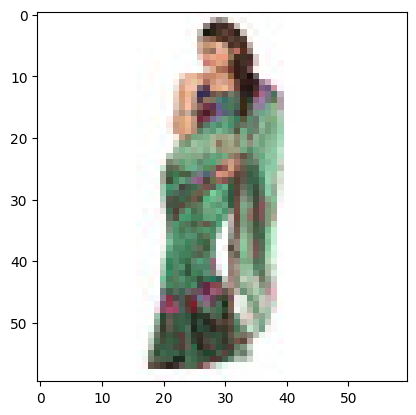

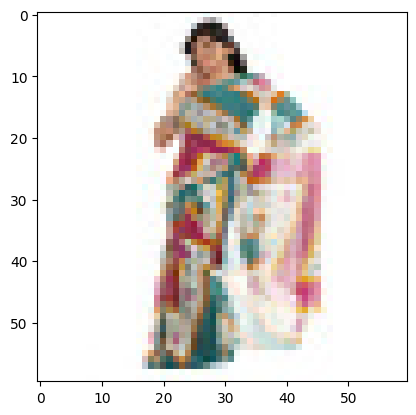

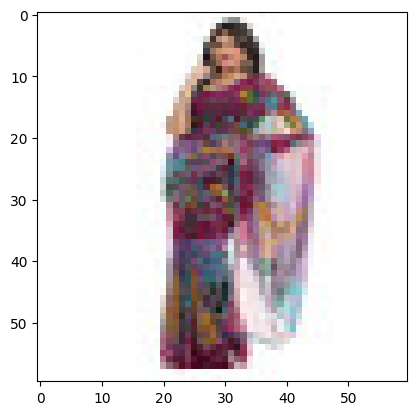

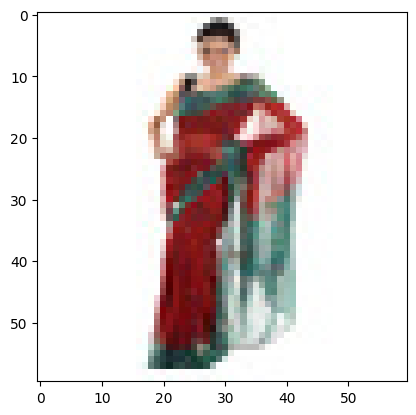

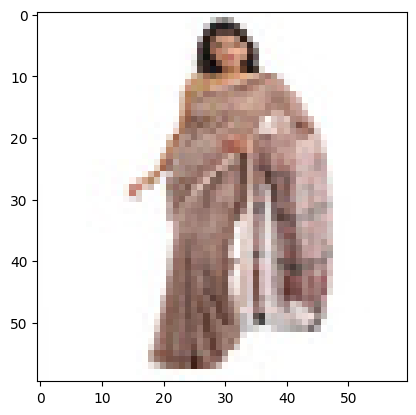

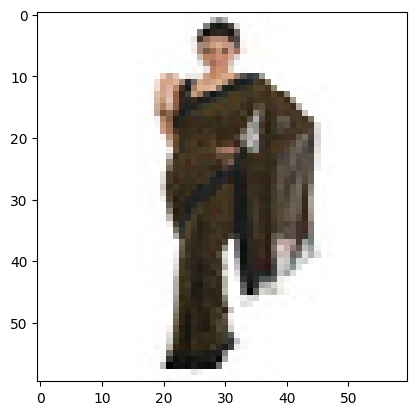

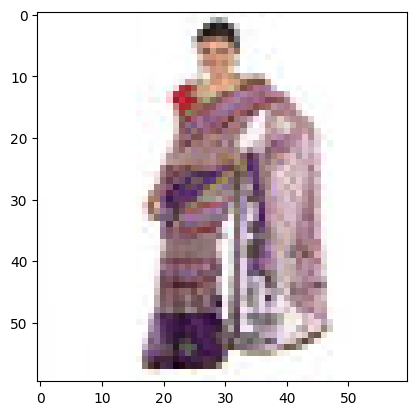

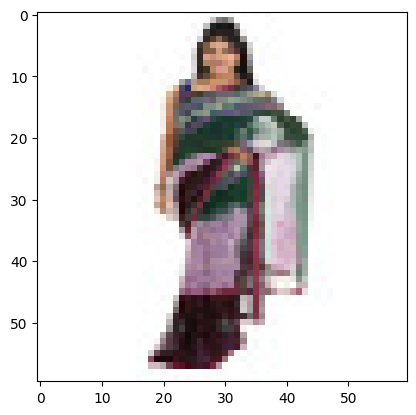

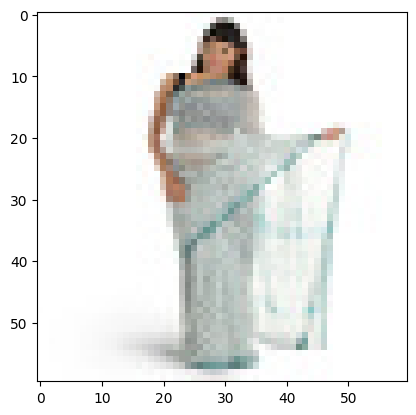

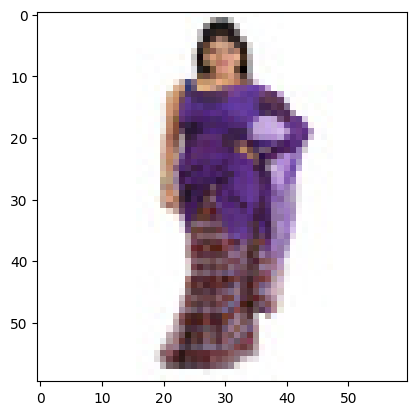

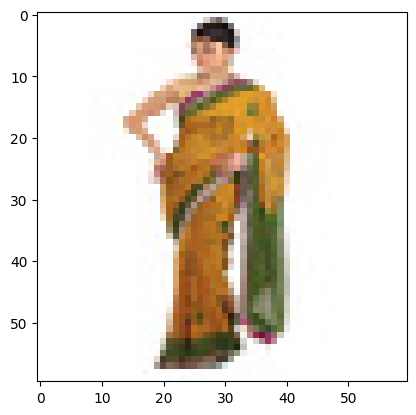

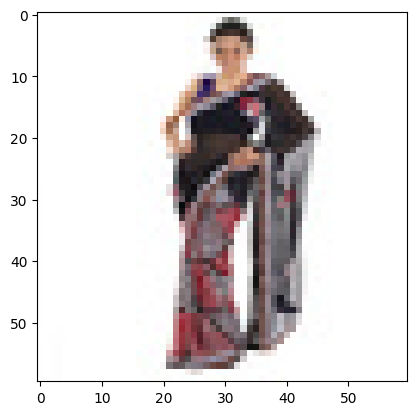

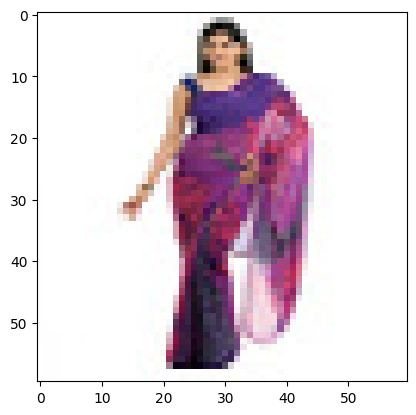

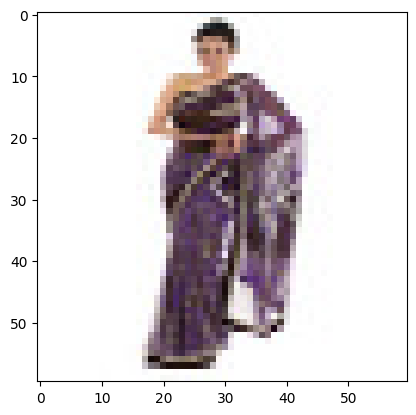

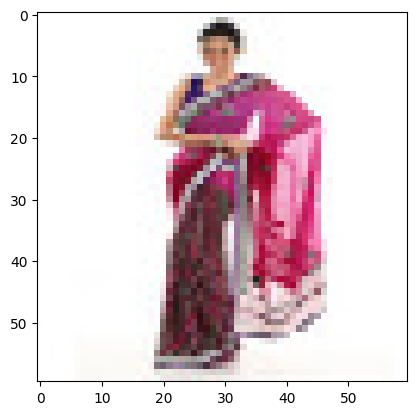

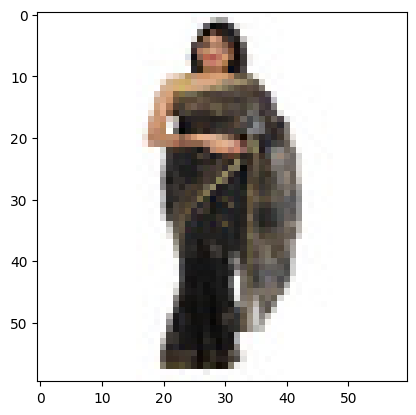

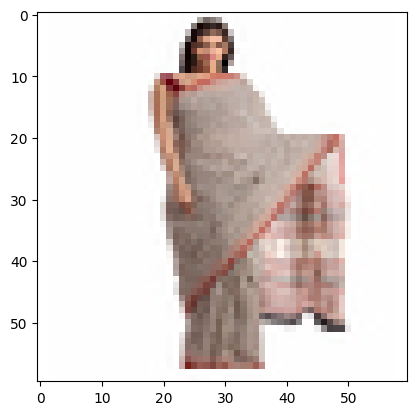

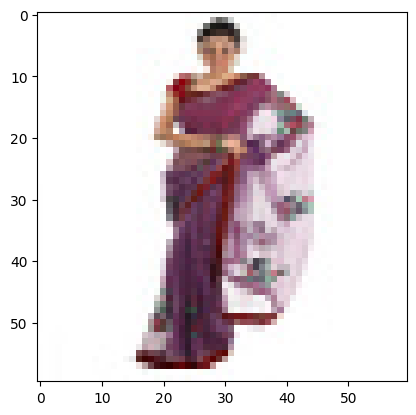

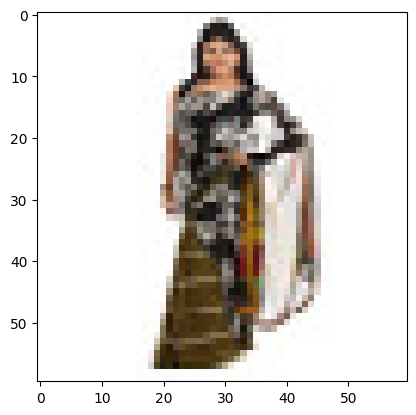

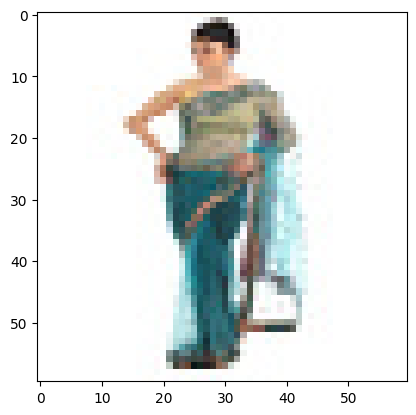

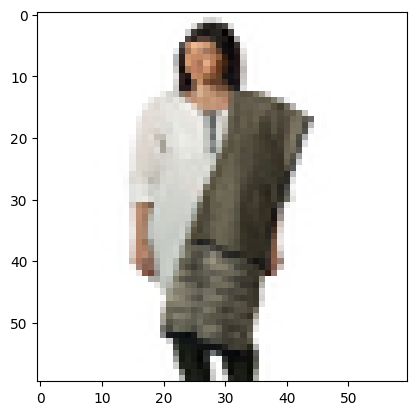

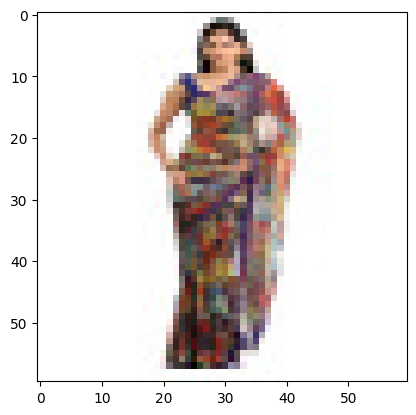

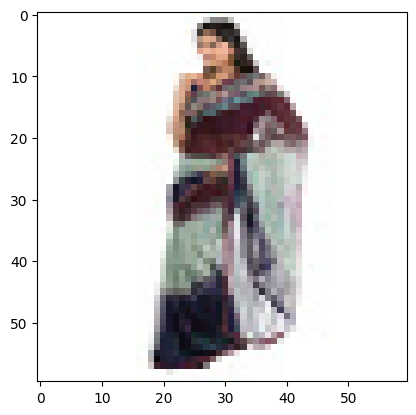

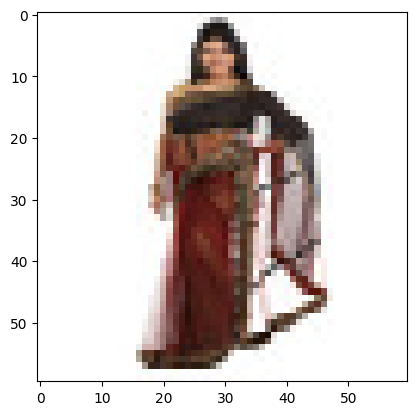

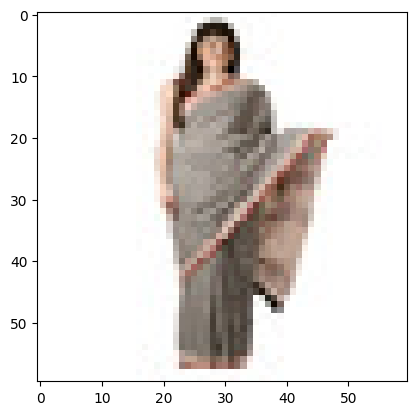

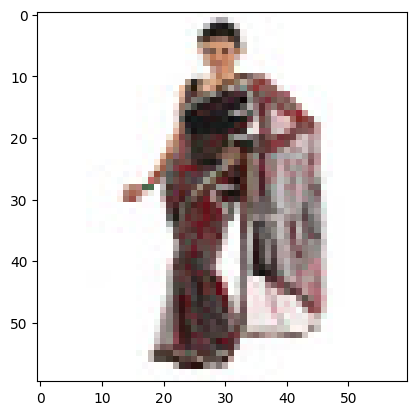

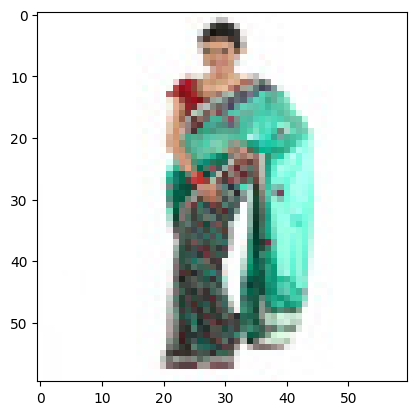

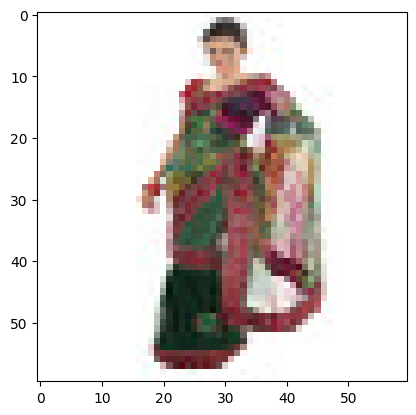

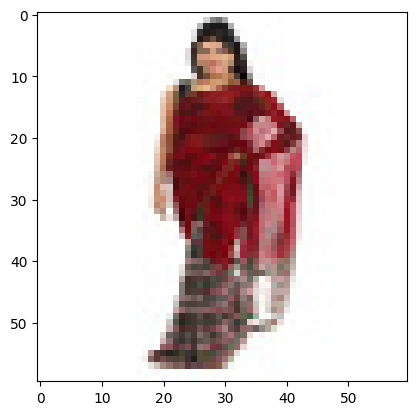

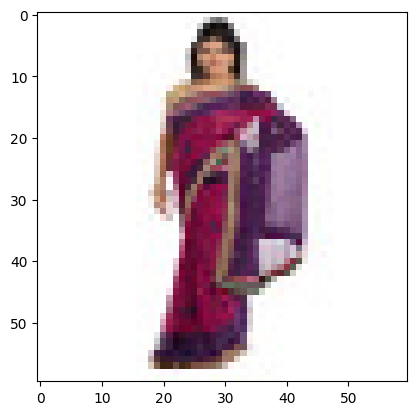

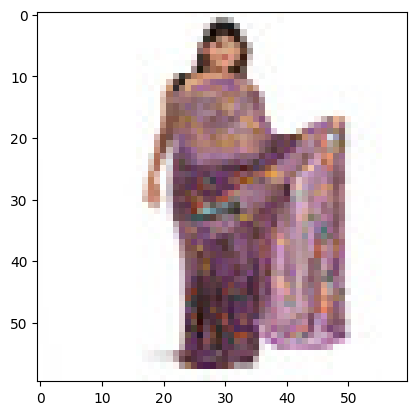

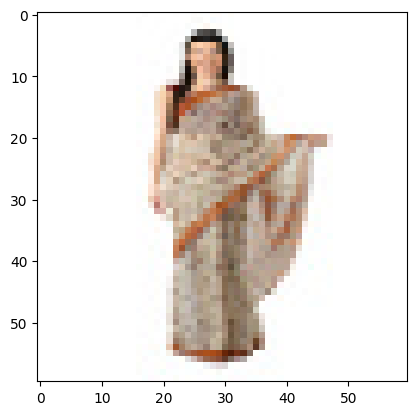

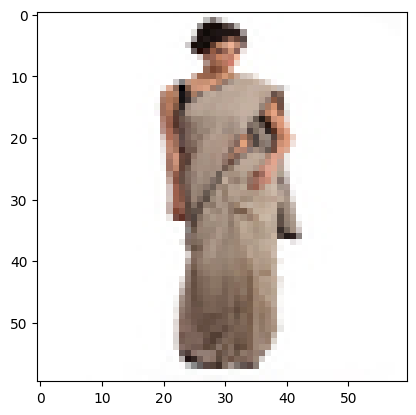

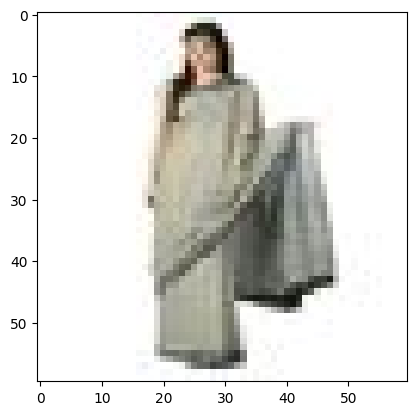

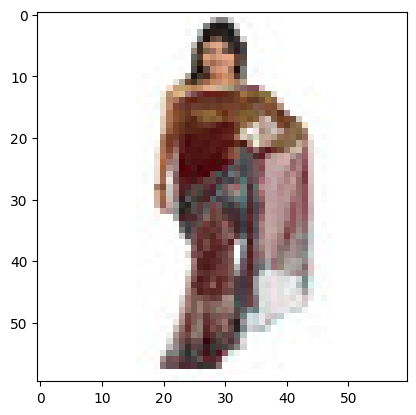

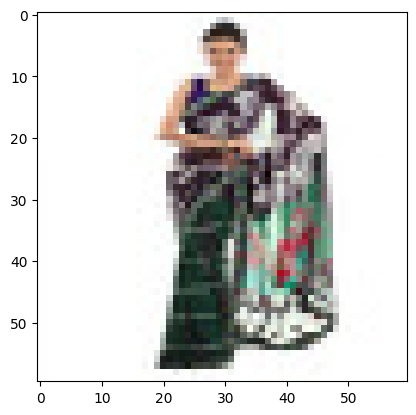

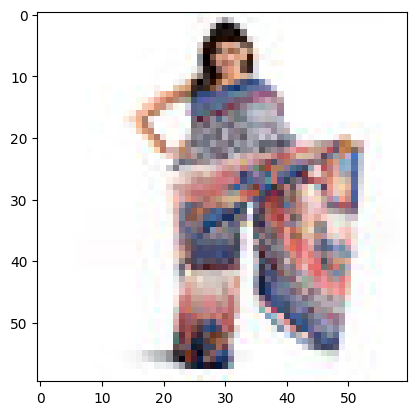

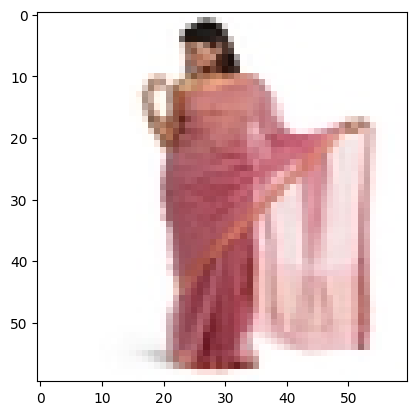

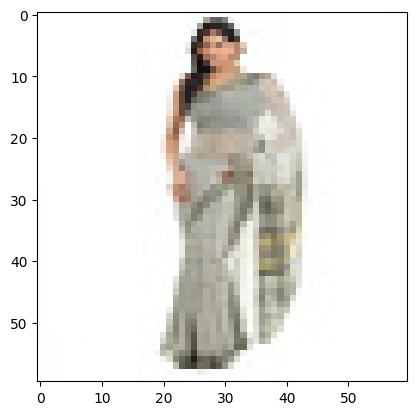

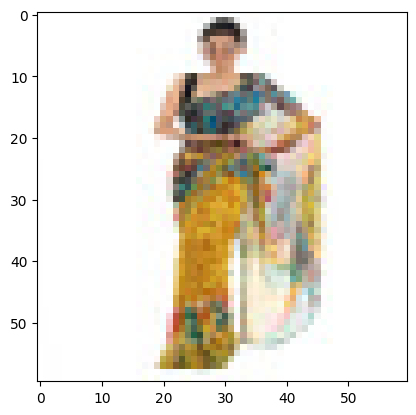

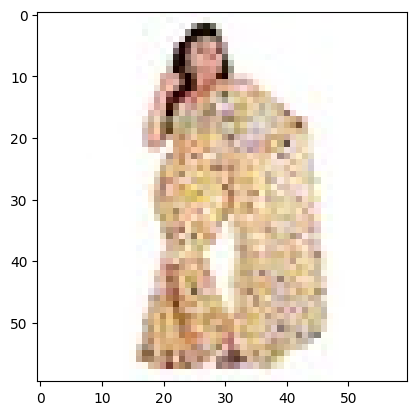

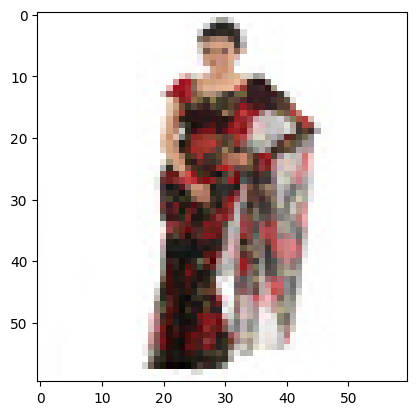

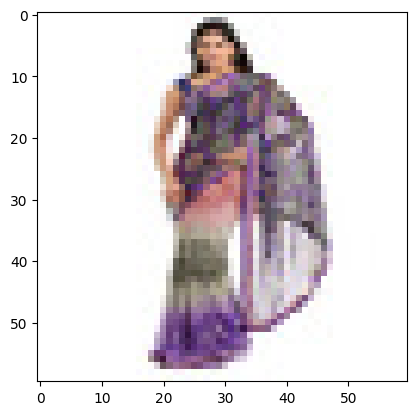

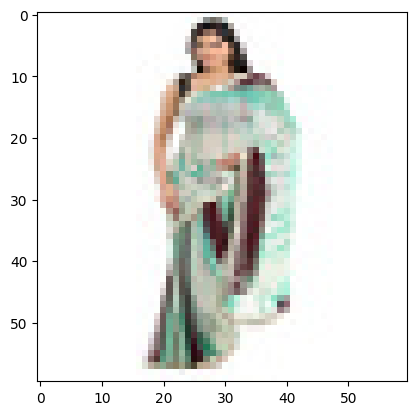

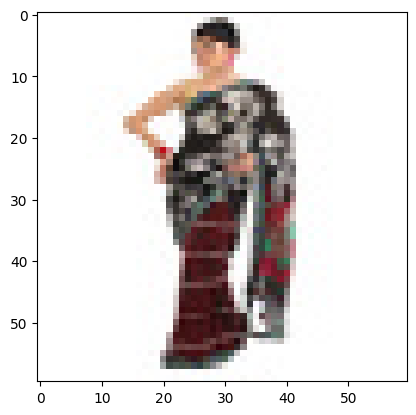

KeyboardInterrupt: 

In [101]:
for index, row in suggested_images.iterrows():
    image = load_img(row["filename"], target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
    plt.imshow(image, interpolation='nearest')
    plt.show()